In [1]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
car = pd.read_csv('Car_sales.csv')
car

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
2,Acura,CL,14.114,18.225,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,NaN
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,Volvo,V40,3.545,NaN,Passenger,24.40,1.9,160.0,100.5,67.6,176.6,3.042,15.8,25.0,9/21/2011,66.498812
153,Volvo,S70,15.245,NaN,Passenger,27.50,2.4,168.0,104.9,69.3,185.9,3.208,17.9,25.0,11/24/2012,70.654495
154,Volvo,V70,17.531,NaN,Passenger,28.80,2.4,168.0,104.9,69.3,186.2,3.259,17.9,25.0,6/25/2011,71.155978
155,Volvo,C70,3.493,NaN,Passenger,45.50,2.3,236.0,104.9,71.5,185.7,3.601,18.5,23.0,4/26/2011,101.623357


In [3]:
car.fillna(method ='ffill', inplace = True)

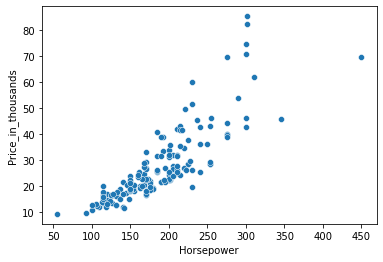

In [4]:
ax = sns.scatterplot(x="Horsepower", y="Price_in_thousands", data=car)
plt.show()

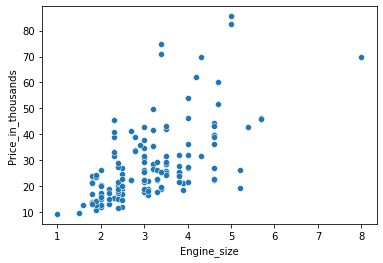

In [5]:
ax1 = sns.scatterplot(x="Engine_size", y="Price_in_thousands", data=car)
plt.show()

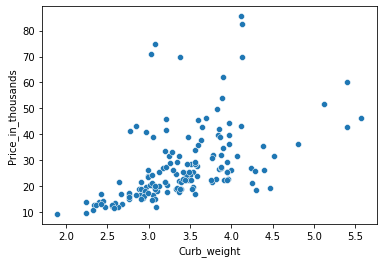

In [6]:
ax2 = sns.scatterplot(x="Curb_weight", y="Price_in_thousands", data=car)
plt.show()

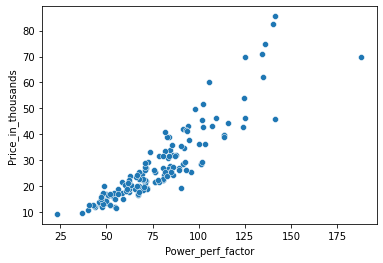

In [7]:
ax3 = sns.scatterplot(x="Power_perf_factor", y="Price_in_thousands", data=car)
plt.show()

As we see from above, the 4 features horsepower, engine_size, curb_weight, and power_perf_factor seem to positiveily correlate with the target variable price. I'm going to use them in my multiple regression.

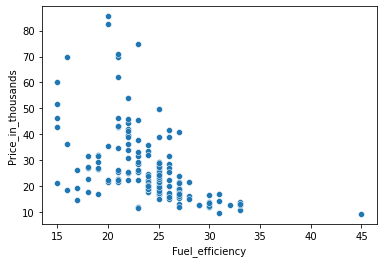

In [8]:
ax4 = sns.scatterplot(x="Fuel_efficiency", y="Price_in_thousands", data=car)
plt.show()

This is just an example that fuel_efficiency negatively correlates with price. It makes sense since luxury cars tend of have more features and are heavier, therefore consuming more energy/fuel.

In [9]:
X = car.loc[:, ['Horsepower', 'Engine_size','Curb_weight','Power_perf_factor']]
y = car["Price_in_thousands"]

print(X)
print(y)

     Horsepower  Engine_size  Curb_weight  Power_perf_factor
0         140.0          1.8        2.639          58.280150
1         225.0          3.2        3.517          91.370778
2         225.0          3.2        3.470          91.370778
3         210.0          3.5        3.850          91.389779
4         150.0          1.8        2.998          62.777639
..          ...          ...          ...                ...
152       160.0          1.9        3.042          66.498812
153       168.0          2.4        3.208          70.654495
154       168.0          2.4        3.259          71.155978
155       236.0          2.3        3.601         101.623357
156       201.0          2.9        3.600          85.735655

[157 rows x 4 columns]
0      21.50
1      28.40
2      28.40
3      42.00
4      23.99
       ...  
152    24.40
153    27.50
154    28.80
155    45.50
156    36.00
Name: Price_in_thousands, Length: 157, dtype: float64


## Split the data and train the model

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

## Our model parameters

In [11]:
for i, name in enumerate(X.columns):
    print(f'{name:}: {model.coef_[i]:24.20f}')

print()
print(f'y-intercept: {model.intercept_:23.20f}')

Horsepower:  -0.91689126665340836553
Engine_size:  -0.67542434072404111678
Curb_weight:   0.00000001003493714367
Power_perf_factor:   2.59231560571384500591

y-intercept:  0.00000000152044776769


## Test the model

In [12]:
from sklearn import metrics

predicted = model.predict(X_test)
expected  = y_test

r2 = metrics.r2_score(expected, predicted)
r  = math.sqrt(r2)

print(f'coefficient of determination = {r2:.3f}')
print(f'     correlation coefficient = {r:.3f}')

coefficient of determination = 1.000
     correlation coefficient = 1.000


### Visualize the expected vs. predicted prices 

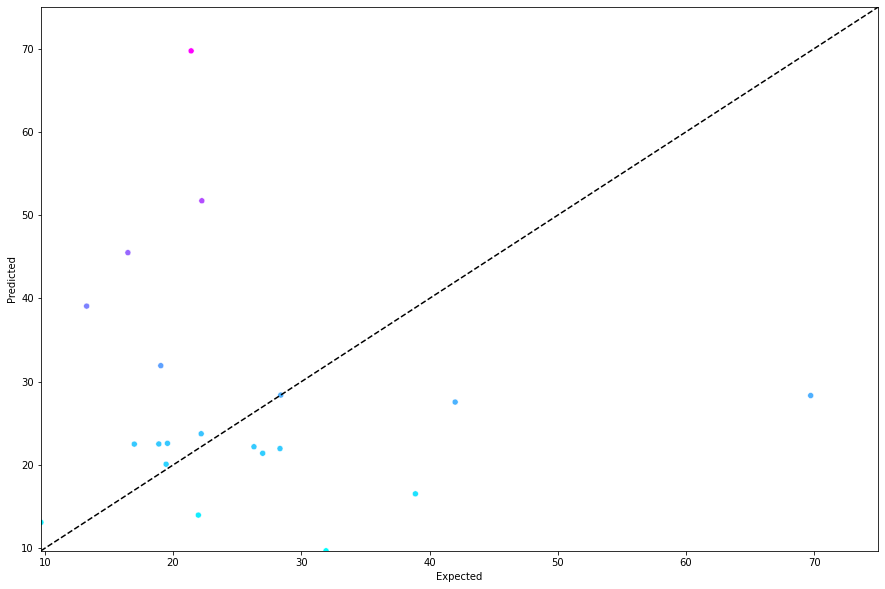

In [13]:
df = pd.DataFrame()

df['Expected']  = pd.Series(expected)
df['Predicted'] = pd.Series(predicted)

figure = plt.figure(figsize=(15, 10))

axes = sns.scatterplot(data=df, x='Expected', y='Predicted', 
                       hue='Predicted', palette='cool', 
                       legend=False)

start = min(expected.min(), predicted.min())
end   = max(expected.max(), predicted.max())

axes.set_xlim(start, end)
axes.set_ylim(start, end)

line = plt.plot([start, end], [start, end], 'k--')

## Conclusion

Based on the metrics that my model produced, the degrees of correlation are perfect (both r and r^2 are 1). However, I think it is because my dataset is small (157 rows) and maybe power_perf_factor is a very significant predictor. As we can see, there are still a few outliers on the expected vs. predicted plot above.

In [19]:
# Now I try to exclude the power_perf_factor column
X = car.loc[:, ['Horsepower', 'Engine_size','Curb_weight']]
y = car["Price_in_thousands"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [20]:
for i, name in enumerate(X.columns):
    print(f'{name:}: {model.coef_[i]:24.20f}')

print()
print(f'y-intercept: {model.intercept_:23.20f}')

Horsepower:   0.25708780768122801996
Engine_size:  -5.19143997951067870389
Curb_weight:   5.27616358993451051163

y-intercept: -21.84781012291017532334


In [21]:
predicted = model.predict(X_test)
expected  = y_test

r2 = metrics.r2_score(expected, predicted)
r  = math.sqrt(r2)

print(f'coefficient of determination = {r2:.3f}')
print(f'     correlation coefficient = {r:.3f}')

coefficient of determination = 0.719
     correlation coefficient = 0.848
